In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [ ]:
def custom_autopct(pct, allvals):
    total = sum(allvals)
    absolute = int(pct/100.*total)
    return f"{pct:.1f}%" if pct > 5 else ''

In [3]:
df = pd.read_csv("../data/preprocessed_2022_public_lar.csv")

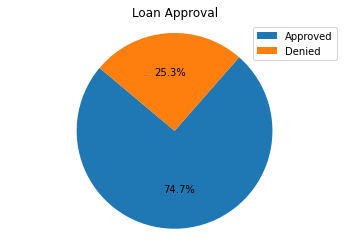

In [4]:
counts = df['loan_approved'].value_counts()
plt.pie(counts, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend(labels=['Approved', 'Denied'])
plt.title('Loan Approval')
plt.show()

In [6]:
df['race'].value_counts()

White                                        3997362
Black or African American                     668765
Asian                                         412135
American Indian or Alaska Native               52260
Native Hawaiian or Other Pacific Islander      18048
2 or more minority races                       16951
Name: race, dtype: int64

In [8]:
df['race'] = df['race'].replace({'Black or African American': 'Black', 'American Indian or Alaska Native': 'Native', 'Native Hawaiian or Other Pacific Islander': 'Pacific Islander', '2 or more minority races': '2+ Minority Races'})

total = df['race'].value_counts(normalize=True)
approved = df[df['loan_approved'] == 1]['race'].value_counts(normalize=True)
denied = df[df['loan_approved'] == 0]['race'].value_counts(normalize=True)

total /= total.sum()
approved /= approved.sum()
denied /= denied.sum()

proportions_race = pd.DataFrame({
    'Total': total,
    'Approved': approved,
    'Denied': denied
})

proportions_race.round(3)

,Total,Approved,Denied
White,0.774,0.793,0.718
Black,0.129,0.110,0.187
Asian,0.080,0.083,0.070
Native,0.010,0.008,0.015
Pacific Islander,0.003,0.003,0.005
2+ Minority Races,0.003,0.003,0.005


In [9]:
df['ethnicity'].value_counts()

Not Hispanic or Latino    4502990
Hispanic or Latino         662531
Name: ethnicity, dtype: int64

In [10]:
df['ethnicity'] = df['ethnicity'].replace({'Not Hispanic or Latino': 'Non-Hispanic', 'Hispanic or Latino': 'Hispanic'})

total = df['ethnicity'].value_counts(normalize=True)
approved = df[df['loan_approved'] == 1]['ethnicity'].value_counts(normalize=True)
denied = df[df['loan_approved'] == 0]['ethnicity'].value_counts(normalize=True)

total /= total.sum()
approved /= approved.sum()
denied /= denied.sum()

proportions_ethnicity = pd.DataFrame({
    'Total': total,
    'Approved': approved,
    'Denied': denied
})

proportions_ethnicity.round(3)

,Total,Approved,Denied
Non-Hispanic,0.872,0.88,0.847
Hispanic,0.128,0.12,0.153


In [11]:
df['sex'].value_counts()

Male      3073328
Female    2092193
Name: sex, dtype: int64

In [12]:
total = df['sex'].value_counts(normalize=True)
approved = df[df['loan_approved'] == 1]['sex'].value_counts(normalize=True)
denied = df[df['loan_approved'] == 0]['sex'].value_counts(normalize=True)

total /= total.sum()
approved /= approved.sum()
denied /= denied.sum()

proportions_sex = pd.DataFrame({
    'Total': total,
    'Approved': approved,
    'Denied': denied
})

proportions_sex.round(3)

,Total,Approved,Denied
Male,0.595,0.6,0.58
Female,0.405,0.4,0.42


In [13]:
total = df['age'].value_counts(normalize=True)
approved = df[df['loan_approved'] == 1]['age'].value_counts(normalize=True)
denied = df[df['loan_approved'] == 0]['age'].value_counts(normalize=True)

total /= total.sum()
approved /= approved.sum()
denied /= denied.sum()

proportions_age = pd.DataFrame({
    'Total': total,
    'Approved': approved,
    'Denied': denied
})

proportions_age.round(3)

,Total,Approved,Denied
25-34,0.203,0.216,0.166
35-44,0.249,0.252,0.240
45-54,0.219,0.216,0.231
55-64,0.167,0.161,0.183
65-74,0.090,0.085,0.104
<25,0.036,0.039,0.030
>74,0.035,0.032,0.045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165521 entries, 0 to 5165520
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   msa_md                                    int64  
 1   conforming_loan_limit                     object 
 2   loan_product_type                         object 
 3   dwelling_category                         object 
 4   ethnicity                                 object 
 5   race                                      object 
 6   sex                                       object 
 7   preapproval                               int64  
 8   loan_purpose                              int64  
 9   open_end_line_of_credit                   int64  
 10  business_or_commercial_purpose            int64  
 11  loan_amount                               int64  
 12  combined_loan_to_value_ratio              float64
 13  interest_rate                             float64
 14  ra

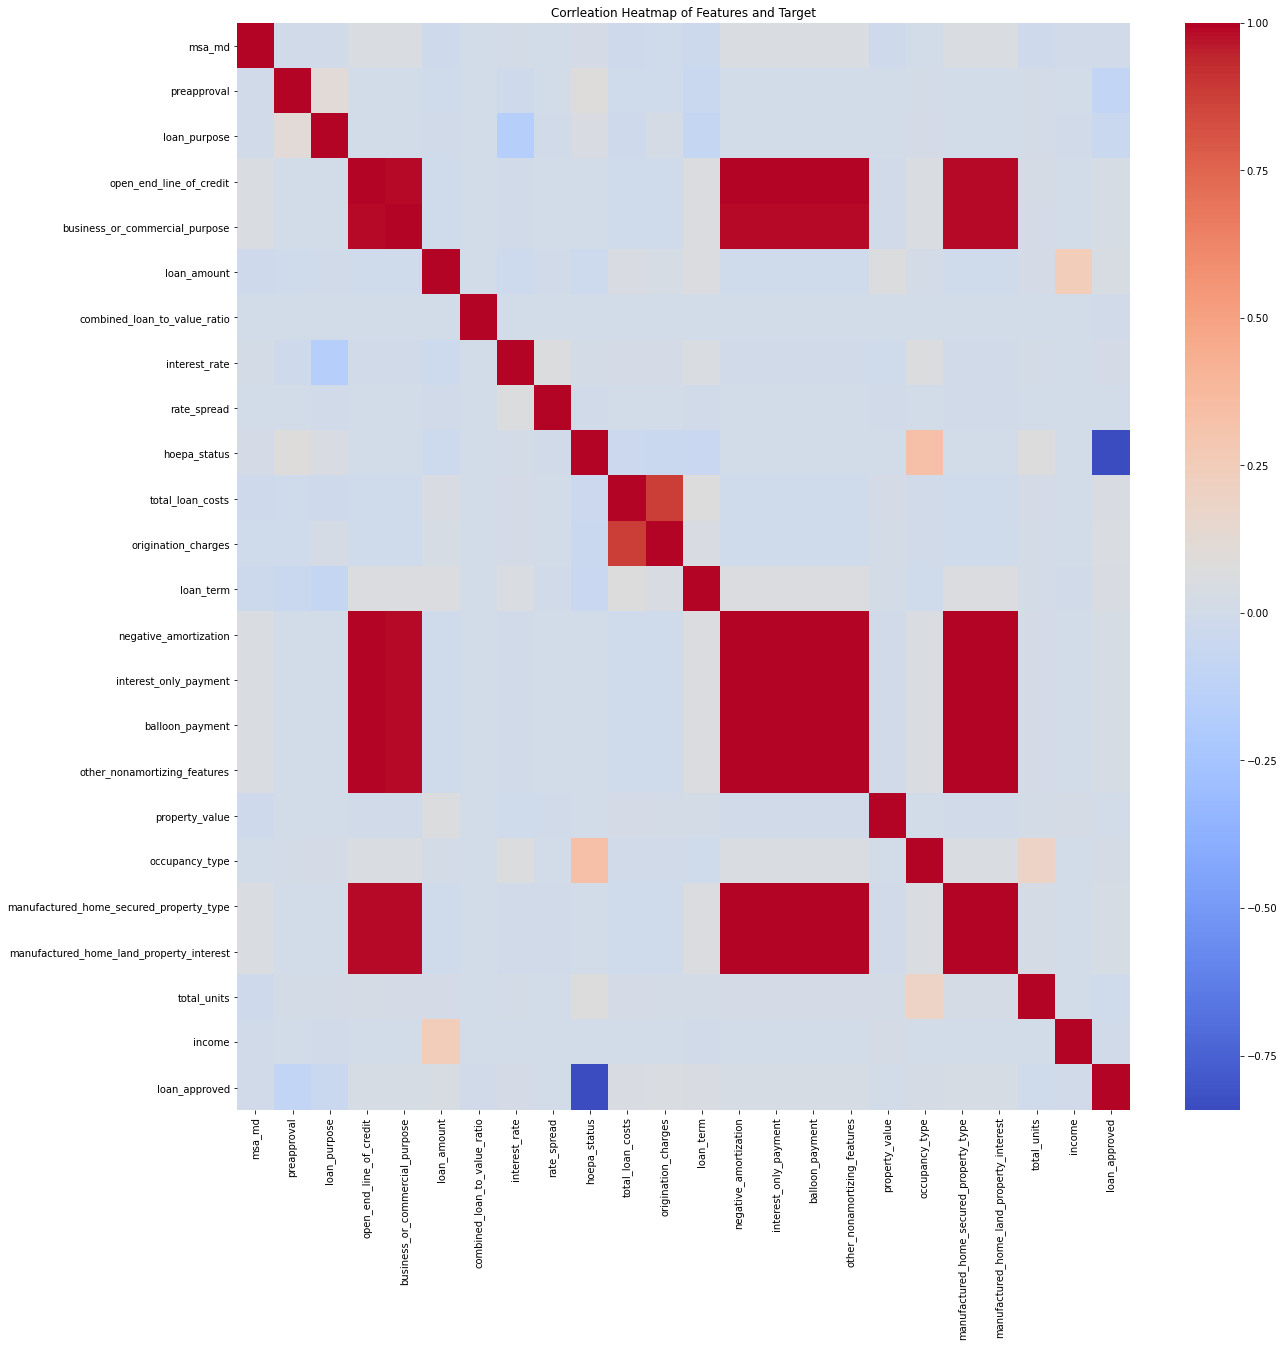

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Corrleation Heatmap of Features and Target")
plt.show()